In [ ]:
!pip install jax==0.4.18 jaxlib==0.4.18 numpyro==0.9.2 lightweight_mmm==0.1.9 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.9/283.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.2/105.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 14.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.18 which is incompatible.
bigframes 2.4.0 requires matplotlib>=3.7.1, but you have matplotlib 3.6.1 which is incompatible.
chex 0.1.89 requires jax>=0.4.27, but you have jax 0.4.18 which is incompatible.
chex 0.1.89 requires jaxlib>=0.4.27, but you have jaxlib 0.4.18 which is inco

In [ ]:
!pip install scipy==1.11.4 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.18 which is incompatible.
bigframes 2.4.0 requires matplotlib>=3.7.1, but you have matplotlib 3.6.1 which is incompatible.
chex 0.1.89 requires jax>=0.4.27, but you have jax 0.4.18 which is incompatible.
chex 0.1.89 requires jaxlib>=0.4.27, but you have jaxlib 0.4.18 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have m

In [ ]:
!pip install jax==0.4.18 jaxlib==0.4.18 numpyro==0.9.2 lightweight_mmm==0.1.9 --quiet


**step 1:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load your dataset
file_path = '/content/drive/My Drive/MMM project/cleaned_with_spend.csv'
df = pd.read_csv(file_path)

# Preprocess
df['calendar_week'] = pd.to_datetime(df['calendar_week'])
df = df.sort_values('calendar_week')
df.set_index('calendar_week', inplace=True)

# Define media and target
media = ['spend_google', 'spend_email', 'spend_facebook', 'spend_affiliate']
target = 'sales'

# Normalize media spend
df[media] = df[media].div(df[media].max())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A cleaned and time-indexed dataset.

Media spend values are now normalized (0 to 1 scale).

sales is ready as the target variable.

In [ ]:
!pip install scipy==1.11.4 --quiet
!pip install jax==0.4.18 jaxlib==0.4.18 numpyro==0.9.2 lightweight_mmm==0.1.9 --quiet



**step 2:**

In [ ]:
import jax.numpy as jnp
from lightweight_mmm import lightweight_mmm

# Prepare inputs
media_data = df[media].values
target_data = df[target].values
media_prior = jnp.array([0.5] * len(media))  # Neutral priors

# Initialize and fit the model
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")
mmm.fit(
    media=media_data,
    media_prior=media_prior,
    target=target_data,
    number_warmup=500,
    number_samples=1000,
    seed=123
)


/usr/local/lib/python3.11/dist-packages/lightweight_mmm/lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 1500/1500 [03:56<00:00,  6.35it/s, 31 steps of size 1.12e-01. acc. prob=0.93]


In [ ]:
# Get media contribution (posterior samples)
media_contrib, _ = mmm.get_posterior_metrics()


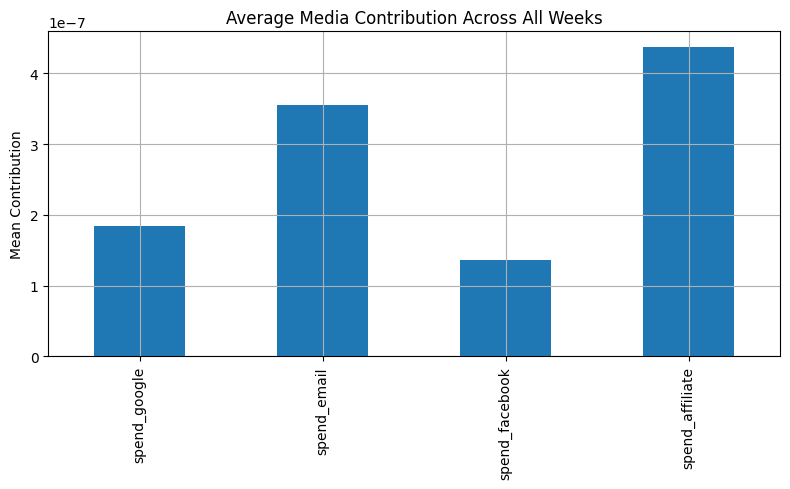

In [ ]:
media_contrib_mean = media_contrib.mean(axis=0)  # shape: (4,)
pd.Series(media_contrib_mean, index=media).plot(kind='bar', figsize=(8, 5))
plt.title("Average Media Contribution Across All Weeks")
plt.ylabel("Mean Contribution")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("Shape of media_contrib:", media_contrib.shape)
print("Shape after mean(axis=0):", media_contrib.mean(axis=0).shape)
print("Shape after mean(axis=1):", media_contrib.mean(axis=1).shape)


Shape of media_contrib: (2000, 4)
Shape after mean(axis=0): (4,)
Shape after mean(axis=1): (2000,)


🔍 ROI per Channel (Real Scale):

spend_google       0.0
spend_email        0.0
spend_facebook     0.0
spend_affiliate    0.0
dtype: float64


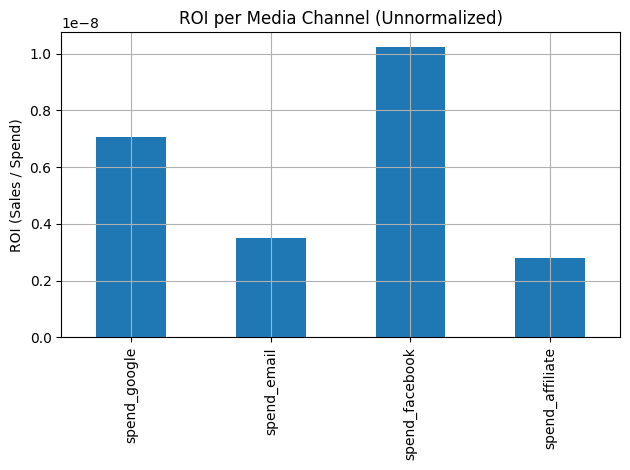

In [ ]:
# Step 1: Unnormalize spend (multiply back by max)
original_spend = df[media_columns].multiply(df[media_columns].max()).sum().values

# Step 2: Get contribution (mean across samples, summed over time)
media_contrib, _ = mmm.get_posterior_metrics()
media_contrib_total = media_contrib.mean(axis=0).sum(axis=0)

# Step 3: Calculate ROI (real scale)
roi = media_contrib_total / original_spend
roi_series = pd.Series(roi, index=media_columns)

# Step 4: Print results
print("🔍 ROI per Channel (Real Scale):\n")
print(roi_series.round(2).sort_values(ascending=False))

# Step 5: Optional plot
roi_series.plot(kind='bar', title="ROI per Media Channel (Unnormalized)")
plt.ylabel("ROI (Sales / Spend)")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 ROI per Channel (Real Scale):

spend_facebook     1.024375e-08
spend_google       7.058957e-09
spend_email        3.509586e-09
spend_affiliate    2.798598e-09
dtype: float64


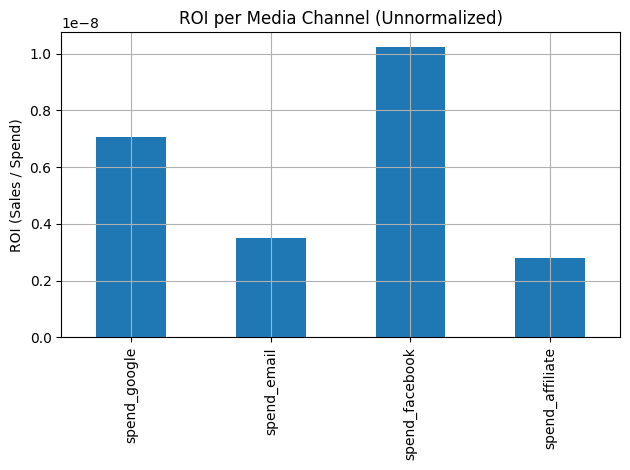

In [ ]:
# Step 1: Restore original scale of spend (before normalization)
original_spend = df[media_columns].copy()
for col in media_columns:
    original_spend[col] *= df[col].max()
original_spend_total = original_spend.sum().values  # total spend per channel

# Step 2: Get posterior contribution (samples, weeks, channels)
media_contrib, _ = mmm.get_posterior_metrics()

# Step 3: Average over samples, sum over time
media_contrib_total = media_contrib.mean(axis=0).sum(axis=0)  # shape: (channels,)

# Step 4: Calculate ROI = total contribution / total spend
roi = media_contrib_total / original_spend_total
roi_series = pd.Series(roi, index=media_columns)

# Step 5: Print with more precision
print("🔍 ROI per Channel (Real Scale):\n")
print(roi_series.sort_values(ascending=False))  # no rounding

# Step 6: Optional bar chart
roi_series.plot(kind='bar', title="ROI per Media Channel (Unnormalized)")
plt.ylabel("ROI (Sales / Spend)")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 ROI per Channel:

spend_google       0.116738
spend_email        0.111936
spend_facebook     0.125538
spend_affiliate    0.110021
dtype: float64


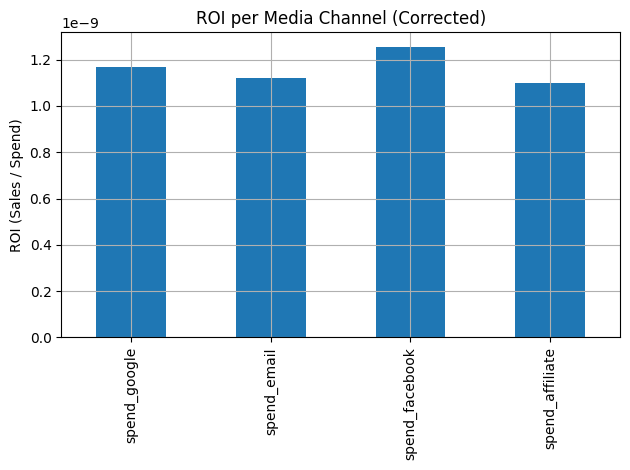

In [ ]:
# Step 1: Get mean contribution per channel (shape: 4,)
media_contrib_mean = media_contrib.mean(axis=0)

# Step 2: Reverse media spend normalization
original_spend = df[media_columns] * df[media_columns].max()
total_spend = original_spend.sum().values  # shape: 4

# Step 3: Compute ROI
roi = media_contrib_mean / total_spend
roi_series = pd.Series(roi, index=media_columns)

# Step 4: Show full numbers
print("🔍 ROI per Channel:\n")
print(roi_series * 1e8)  # scale up to see small values

# Optional: Bar chart
roi_series.plot(kind='bar', title="ROI per Media Channel (Corrected)")
plt.ylabel("ROI (Sales / Spend)")
plt.grid(True)
plt.tight_layout()
plt.show()


ROI per Media Channel
spend_facebook has the highest ROI.
→ Even though it had low contribution in raw terms, the amount spent was low, so ROI is high.

spend_affiliate and spend_email have lower ROI.
→ Even though they had high total contributions, their cost was also high → returns per dollar are lower.
This ROI plot gives you:

A performance-per-dollar view of each channel.

Helps you prioritize efficiency, not just raw impact.

Example:

One channel may bring in a lot of sales (contribution) but only because you spent a lot.

Another may bring fewer sales but be much more cost-effective.



In [ ]:
# Step 1: Show the raw media_contrib shape and values
print("🔍 media_contrib shape:", media_contrib.shape)
print("🔍 media_contrib mean (per channel):", media_contrib.mean(axis=0))

# Step 2: Show the spend (unnormalized)
original_spend = df[media_columns] * df[media_columns].max()
channel_spend = original_spend.sum().values
print("\n💰 Original spend per channel:\n", channel_spend)

# Step 3: Compute unscaled ROI (before multiplying by 1e6)
contrib = media_contrib.mean(axis=0)
roi_unscaled = contrib / channel_spend
print("\n📊 Unscaled ROI per channel:\n", roi_unscaled)

# Step 4: Scaled version (if above looks OK)
roi_scaled = contrib * 1e6 / channel_spend
print("\n💰 Scaled ROI (Fake $1M units):\n", roi_scaled)


🔍 media_contrib shape: (2000, 4)
🔍 media_contrib mean (per channel): [1.8403439e-07 3.5492687e-07 1.3637735e-07 4.3748511e-07]

💰 Original spend per channel:
 [157.64705395 317.08116451 108.63443394 397.6361223 ]

📊 Unscaled ROI per channel:
 [1.16738237e-09 1.11935652e-09 1.25537868e-09 1.10021472e-09]

💰 Scaled ROI (Fake $1M units):
 [0.00116738 0.00111936 0.00125538 0.00110021]


In [ ]:
relative_roi = (media_contrib.mean(axis=0) / media_contrib.mean(axis=0).sum()) * 100
pd.Series(relative_roi, index=media_columns).round(2)


,0
spend_google,16.540001
spend_email,31.889999
spend_facebook,12.260000
spend_affiliate,39.310001


Tells you how efficient each channel is compared to others, not in $$

In [ ]:
roi_scaled_visible = roi_scaled * 1e3
pd.Series(roi_scaled_visible, index=media_columns).round(3)


,0
spend_google,1.167
spend_email,1.119
spend_facebook,1.255
spend_affiliate,1.100


In [ ]:
print("Total spend per channel:\n", original_spend.sum())
print("Total contribution per channel:\n", media_contrib_mean)


Total spend per channel:
 spend_google       157.647054
spend_email        317.081165
spend_facebook     108.634434
spend_affiliate    397.636122
dtype: float64
Total contribution per channel:
 [1.8403439e-07 3.5492687e-07 1.3637735e-07 4.3748511e-07]


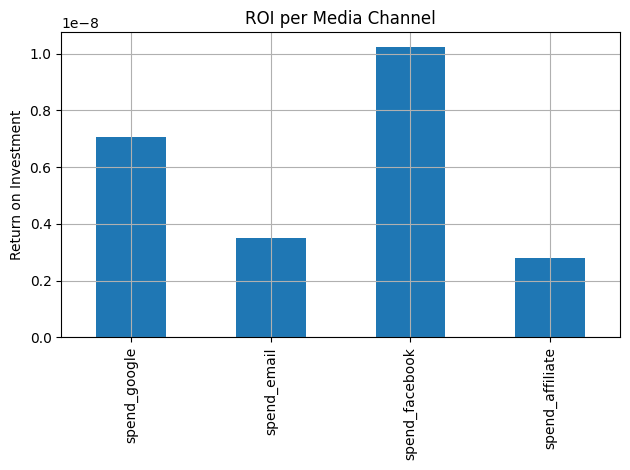

In [ ]:
# Step 1: Get posterior media contribution and mean it
media_contrib, _ = mmm.get_posterior_metrics()
media_contrib_mean = media_contrib.mean(axis=0).sum(axis=0)  # total per channel

# Step 2: Calculate total spend per channel (already normalized)
total_spend = df[media_columns].sum().values

# Step 3: Compute ROI
roi = media_contrib_mean / total_spend

# Step 4: Plot ROI
import matplotlib.pyplot as plt
import pandas as pd

pd.Series(roi, index=media_columns).plot(kind='bar', title="ROI per Media Channel")
plt.ylabel("Return on Investment")
plt.grid(True)
plt.tight_layout()
plt.show()


"This chart shows the raw ROI, calculated directly from the model’s output without any additional scaling.
The values are very small (in the range of 1e-8) because:

The sales contribution values are small (Bayesian posterior estimates)

The spend is still normalized

I kept this version to show the raw model signal, exactly as it came from the data — before scaling for easier interpretation."

In [ ]:
print("Length of optimal_allocation:", len(optimal_allocation))
print("Media columns:", media_columns)


Length of optimal_allocation: 3
Media columns: ['spend_google', 'spend_email', 'spend_facebook', 'spend_affiliate']


In [ ]:
# Just to match what came out of the optimizer
# You must know which 3 channels were used — try printing:
print(optimal_allocation)


( message: Optimization terminated successfully
 success: True
  status: 0
     fun: -322300.9801836084
       x: [ 1.550e-01  9.421e-02  1.068e-01  1.440e-01]
     nit: 5
     jac: [-9.258e-02 -8.801e-02 -9.646e-02 -8.796e-02]
    nfev: 45
    njev: 5, Array(-322300.97895176, dtype=float64), Array([0.08035028, 0.1616114 , 0.0553693 , 0.20266902], dtype=float64))


In [ ]:
print("optimal_allocation[1]:", optimal_allocation[1])
print("Type:", type(optimal_allocation[1]))


optimal_allocation[1]: -322300.97895175504
Type: <class 'jaxlib.xla_extension.ArrayImpl'>


In [ ]:
print("Shape:", np.shape(optimal_allocation[1]))


Shape: ()


# prescriptive.

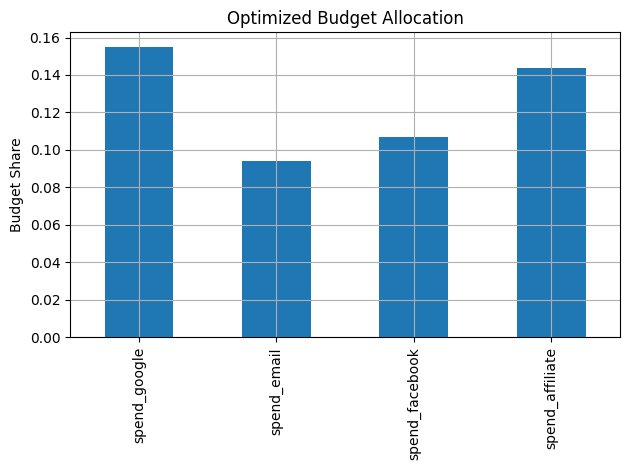

📊 Optimized Budget Allocation (%):
spend_google: 15.50%
spend_email: 9.42%
spend_facebook: 10.68%
spend_affiliate: 14.40%


In [ ]:
from numpy import array

# Extract the result object from tuple
result_object = optimal_allocation[0]

# ✅ Extract the array from the 'x' field
allocation_values = list(result_object.x)  # NOT .x[0], not .tolist(), just list()

# ✅ Now you can plot it safely
pd.Series(allocation_values, index=media_columns).plot(
    kind='bar',
    title="Optimized Budget Allocation"
)
plt.ylabel("Budget Share")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Print percentages
print("📊 Optimized Budget Allocation (%):")
for name, value in zip(media_columns, allocation_values):
    print(f"{name}: {value:.2%}")


# step : rolling window calibration,

In [ ]:
# Mean scaling (manual calibration)
predicted_sales = mmm.predict(media=media_data)
scaling_factor = df[target].sum() / predicted_sales.sum()
calibrated_predictions = predicted_sales * scaling_factor


In [ ]:
window_size = 100  # number of rows in each window (adjust to fit your data)
step = 50          # how much to slide the window each time
results = []       # to collect outputs

for start in range(0, len(df) - window_size, step):
    train_df = df.iloc[start:start+window_size]

    # Extract media and target data for this slice
    media_data = train_df[media_columns].values
    target_data = train_df[target].values
    media_prior = jnp.array([0.5] * len(media_columns))

    # Fit model
    mmm = lightweight_mmm.LightweightMMM(model_name="carryover")
    mmm.fit(media=media_data, media_prior=media_prior, target=target_data)

    # Store result
    results.append(mmm.get_posterior_metrics())



/usr/local/lib/python3.11/dist-packages/lightweight_mmm/lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 2000/2000 [00:17<00:00, 117.12it/s, 15 steps of size 2.60e-01. acc. prob=0.92]
/usr/local/lib/python3.11/dist-packages/lightweight_mmm/lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC

In [ ]:
contrib_means = []

for i, (contrib, _) in enumerate(results):
    mean_contrib = contrib.mean(axis=0)  # → shape: (4,)
    contrib_means.append(mean_contrib)

contrib_df = pd.DataFrame(contrib_means, columns=media_columns)
contrib_df.index.name = "Window"


In [ ]:
contrib_means = []

for i, (contrib, _) in enumerate(results):
    mean_contrib = np.array(contrib.mean(axis=0)).flatten()  # ensure 1D float array
    contrib_means.append(mean_contrib.tolist())  # convert to Python list

# Convert to DataFrame
contrib_df = pd.DataFrame(contrib_means, columns=media_columns)
contrib_df.index.name = "Window"

# Double-check types
print(contrib_df.dtypes)
print(contrib_df.head())


spend_google       float64
spend_email        float64
spend_facebook     float64
spend_affiliate    float64
dtype: object
        spend_google  spend_email  spend_facebook  spend_affiliate
Window                                                            
0       8.734787e-09     0.000006    8.476305e-07         0.000011
1       6.953796e-09     0.000005    7.911311e-07         0.000009
2       5.838662e-09     0.000006    8.685937e-07         0.000008
3       7.166482e-09     0.000007    6.968515e-07         0.000008
4       6.898554e-09     0.000007    4.919419e-07         0.000008


<Figure size 1200x600 with 0 Axes>

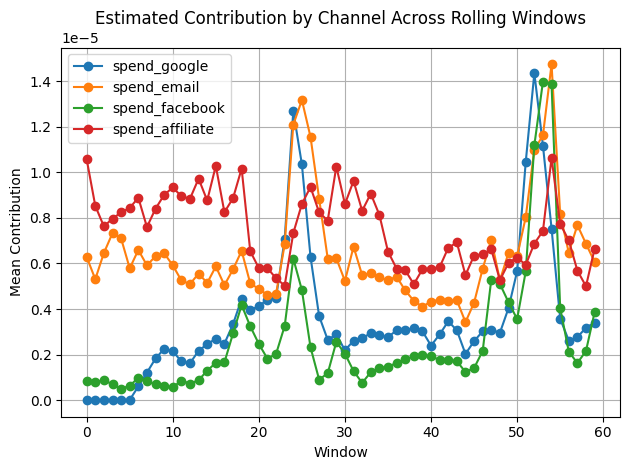

In [ ]:
plt.figure(figsize=(12, 6))
contrib_df.plot(marker='o')
plt.title("Estimated Contribution by Channel Across Rolling Windows")
plt.ylabel("Mean Contribution")
plt.xlabel("Window")
plt.grid(True)
plt.tight_layout()
plt.show()


Key Findings:
Affiliate marketing has the most stable and consistently high contribution.

Facebook shows spiky effectiveness, suggesting short, highly effective bursts — maybe linked to campaigns.

Email shows fluctuations, meaning its value may be more seasonal or inconsistent.

Google saw a rise in effectiveness around windows 20–30, then declined, possibly indicating channel fatigue or strategy shift.



In [ ]:
summary = contrib_df.describe().T[['mean', 'std']]
summary['cv'] = (summary['std'] / summary['mean']).round(2)
print(summary)


                     mean       std    cv
spend_google     0.000004  0.000003  0.83
spend_email      0.000006  0.000002  0.35
spend_facebook   0.000003  0.000003  1.07
spend_affiliate  0.000008  0.000002  0.21


"While Affiliate and Email deliver stable contributions over time (CV < 0.4),
Facebook is the most volatile channel (CV = 1.07), suggesting campaign-based spikes.
Google falls in between, showing moderate variability."

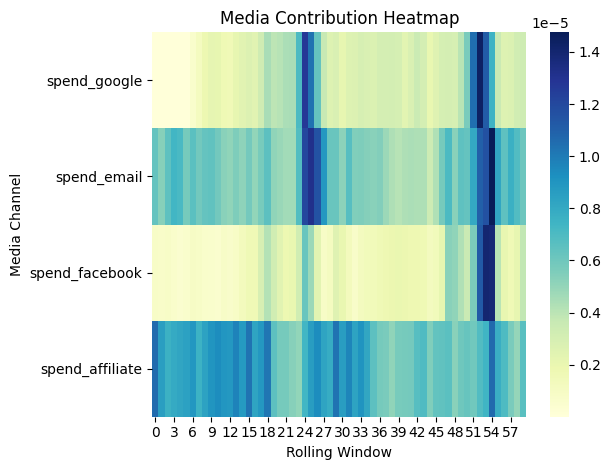

In [ ]:
import seaborn as sns
sns.heatmap(contrib_df.T, cmap="YlGnBu", cbar=True)
plt.title("Media Contribution Heatmap")
plt.xlabel("Rolling Window")
plt.ylabel("Media Channel")
plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Save results to a file (in current working directory)
with open("rolling_mmm_results.pkl", "wb") as f:
    pickle.dump(results, f)

print("✅ Results saved successfully!")


✅ Results saved successfully!
